## S9 - Assignment Objective:

1. Write a new network that  architecture to C1C2C3C40 (No MaxPooling, but 3 convolutions, where the last one has a stride of 2 instead) (If you can figure out how to use Dilated kernels here instead of MP or strided convolution, then 200pts extra!)
2. Total RF must be more than 44
3. one of the layers must use Depthwise Separable Convolution
4. one of the layers must use Dilated Convolution
5. use GAP (compulsory):- add FC after GAP to target #of classes (optional)
6. use albumentation library and apply:
 * horizontal flip
 * shiftScaleRotate
 * coarseDropout (max_holes = 1, max_height=16px, max_width=16, min_holes = 1, min_height=16px, min_width=16px, fill_value=(mean of your dataset), mask_fill_value = None)
7. Achieve 85% accuracy, as many epochs as you want. Total Params to be less than 200k.
make sure you're following code-modularity (else 0 for full assignment)
8. upload to Github

-----




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

!pip install torchsummary
!pip install albumentations

Importing libraries

In [3]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from utils import test, train, plot_curves,get_incorrect_predictions,get_stats,get_train_loader,get_test_loader,get_summary,get_device
from visualize import print_samples,print_class_scale,plot_confusion_matrix,plot_incorrect_predictions
from transformation import get_train_aug_transform,get_test_aug_transform

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR

import warnings
warnings.filterwarnings('ignore')

Loading data and Tranformations

In [4]:
trainloader = get_train_loader(transform=None)

Files already downloaded and verified


In [5]:
## Calculating Mean and Std for Normalization
mean, std = get_stats(trainloader)

[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: (50000, 32, 32, 3)
 - min: 0
 - max: 255

Dataset Mean - [0.49139968 0.48215841 0.44653091]
Dataset Std - [0.24703223 0.24348513 0.26158784] 


In [6]:
## Function normalize and augment images
## Apply HorizontalFlip
## ShiftScaleRotate
## CoarseDropout
train_transform = get_train_aug_transform(mean, std)
test_transform = get_test_aug_transform(mean, std)

In [7]:
train_loader = get_train_loader(transform=train_transform)
test_loader = get_test_loader(transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']


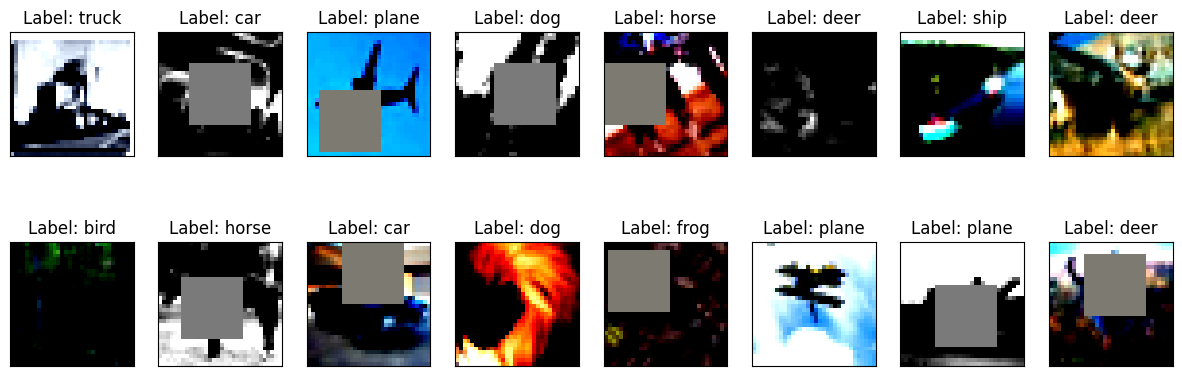

In [9]:
## After Augmentation printing samples
print_samples(train_loader,classes)

In [10]:
## Checking for CUDA and setting SEED
device = get_device()

CUDA Available? True


Transferring model to GPU and printing model summary

In [11]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = Net(norm="BN").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
         Dropout2d-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           4,608
       BatchNorm2d-5           [-1, 32, 32, 32]              64
         Dropout2d-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]           9,216
       BatchNorm2d-8           [-1, 32, 32, 32]              64
         Dropout2d-9           [-1, 32, 32, 32]               0
           Conv2d-10           [-1, 32, 14, 14]           9,216
      BatchNorm2d-11           [-1, 32, 14, 14]              64
        Dropout2d-12           [-1, 32, 14, 14]               0
           Conv2d-13           [-1, 32, 14, 14]           9,216
      BatchNorm2d-14           [-1, 32,

In [12]:
model =  Net(norm='BN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 300
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=1.7545 Batch_id=390 Accuracy=31.23: 100%|██████████| 391/391 [00:14<00:00, 27.59it/s]


Test set: Average loss: 1.4655, Accuracy: 4567/10000 (45.67%)

EPOCH: 1


Train: Loss=1.3765 Batch_id=390 Accuracy=41.91: 100%|██████████| 391/391 [00:12<00:00, 31.08it/s]


Test set: Average loss: 1.2397, Accuracy: 5486/10000 (54.86%)

EPOCH: 2


Train: Loss=1.0854 Batch_id=390 Accuracy=47.63: 100%|██████████| 391/391 [00:12<00:00, 30.82it/s]


Test set: Average loss: 1.1163, Accuracy: 5994/10000 (59.94%)

EPOCH: 3


Train: Loss=1.3468 Batch_id=390 Accuracy=51.34: 100%|██████████| 391/391 [00:12<00:00, 31.44it/s]


Test set: Average loss: 1.0035, Accuracy: 6412/10000 (64.12%)

EPOCH: 4


Train: Loss=1.1895 Batch_id=390 Accuracy=54.28: 100%|██████████| 391/391 [00:12<00:00, 31.14it/s]


Test set: Average loss: 0.9540, Accuracy: 6667/10000 (66.67%)

EPOCH: 5


Train: Loss=1.4174 Batch_id=390 Accuracy=56.55: 100%|██████████| 391/391 [00:12<00:00, 31.32it/s]


Test set: Average loss: 0.8778, Accuracy: 6921/10000 (69.21%)

EPOCH: 6


Train: Loss=1.2739 Batch_id=390 Accuracy=57.77: 100%|██████████| 391/391 [00:12<00:00, 30.51it/s]


Test set: Average loss: 0.8224, Accuracy: 7148/10000 (71.48%)

EPOCH: 7


Train: Loss=1.2481 Batch_id=390 Accuracy=59.48: 100%|██████████| 391/391 [00:12<00:00, 30.97it/s]


Test set: Average loss: 0.8434, Accuracy: 7059/10000 (70.59%)

EPOCH: 8


Train: Loss=1.1143 Batch_id=390 Accuracy=60.60: 100%|██████████| 391/391 [00:12<00:00, 30.87it/s]


Test set: Average loss: 0.7738, Accuracy: 7312/10000 (73.12%)

EPOCH: 9


Train: Loss=1.4851 Batch_id=390 Accuracy=61.00: 100%|██████████| 391/391 [00:13<00:00, 28.74it/s]


Test set: Average loss: 0.7507, Accuracy: 7449/10000 (74.49%)

EPOCH: 10


Train: Loss=1.1224 Batch_id=390 Accuracy=62.33: 100%|██████████| 391/391 [00:12<00:00, 31.19it/s]


Test set: Average loss: 0.7301, Accuracy: 7461/10000 (74.61%)

EPOCH: 11


Train: Loss=1.2092 Batch_id=390 Accuracy=62.68: 100%|██████████| 391/391 [00:12<00:00, 31.27it/s]


Test set: Average loss: 0.7176, Accuracy: 7537/10000 (75.37%)

EPOCH: 12


Train: Loss=1.1240 Batch_id=390 Accuracy=63.71: 100%|██████████| 391/391 [00:12<00:00, 30.87it/s]


Test set: Average loss: 0.6935, Accuracy: 7548/10000 (75.48%)

EPOCH: 13


Train: Loss=1.1531 Batch_id=390 Accuracy=64.24: 100%|██████████| 391/391 [00:12<00:00, 31.63it/s]


Test set: Average loss: 0.6890, Accuracy: 7608/10000 (76.08%)

EPOCH: 14


Train: Loss=1.1540 Batch_id=390 Accuracy=64.79: 100%|██████████| 391/391 [00:12<00:00, 31.30it/s]


Test set: Average loss: 0.6669, Accuracy: 7693/10000 (76.93%)

EPOCH: 15


Train: Loss=1.0440 Batch_id=390 Accuracy=65.32: 100%|██████████| 391/391 [00:12<00:00, 32.50it/s]


Test set: Average loss: 0.6724, Accuracy: 7686/10000 (76.86%)

EPOCH: 16


Train: Loss=0.9116 Batch_id=390 Accuracy=65.90: 100%|██████████| 391/391 [00:12<00:00, 31.56it/s]


Test set: Average loss: 0.6564, Accuracy: 7740/10000 (77.40%)

EPOCH: 17


Train: Loss=0.9446 Batch_id=390 Accuracy=66.15: 100%|██████████| 391/391 [00:12<00:00, 31.48it/s]


Test set: Average loss: 0.6249, Accuracy: 7844/10000 (78.44%)

EPOCH: 18


Train: Loss=0.9383 Batch_id=390 Accuracy=66.36: 100%|██████████| 391/391 [00:12<00:00, 31.48it/s]


Test set: Average loss: 0.6250, Accuracy: 7831/10000 (78.31%)

EPOCH: 19


Train: Loss=0.8692 Batch_id=390 Accuracy=66.53: 100%|██████████| 391/391 [00:12<00:00, 31.26it/s]


Test set: Average loss: 0.6247, Accuracy: 7811/10000 (78.11%)

EPOCH: 20


Train: Loss=0.9339 Batch_id=390 Accuracy=67.09: 100%|██████████| 391/391 [00:12<00:00, 31.63it/s]


Test set: Average loss: 0.6109, Accuracy: 7921/10000 (79.21%)

EPOCH: 21


Train: Loss=0.9360 Batch_id=390 Accuracy=67.22: 100%|██████████| 391/391 [00:11<00:00, 32.63it/s]


Test set: Average loss: 0.6053, Accuracy: 7923/10000 (79.23%)

EPOCH: 22


Train: Loss=0.9712 Batch_id=390 Accuracy=67.45: 100%|██████████| 391/391 [00:12<00:00, 30.90it/s]


Test set: Average loss: 0.6409, Accuracy: 7807/10000 (78.07%)

EPOCH: 23


Train: Loss=1.0251 Batch_id=390 Accuracy=67.72: 100%|██████████| 391/391 [00:11<00:00, 32.81it/s]


Test set: Average loss: 0.5917, Accuracy: 7972/10000 (79.72%)

EPOCH: 24


Train: Loss=0.9089 Batch_id=390 Accuracy=68.30: 100%|██████████| 391/391 [00:11<00:00, 32.84it/s]


Test set: Average loss: 0.5914, Accuracy: 7941/10000 (79.41%)

EPOCH: 25


Train: Loss=0.9531 Batch_id=390 Accuracy=68.64: 100%|██████████| 391/391 [00:12<00:00, 31.31it/s]


Test set: Average loss: 0.5939, Accuracy: 7973/10000 (79.73%)

EPOCH: 26


Train: Loss=0.9254 Batch_id=390 Accuracy=68.62: 100%|██████████| 391/391 [00:12<00:00, 31.05it/s]


Test set: Average loss: 0.5849, Accuracy: 7991/10000 (79.91%)

EPOCH: 27


Train: Loss=0.8888 Batch_id=390 Accuracy=68.61: 100%|██████████| 391/391 [00:12<00:00, 31.52it/s]


Test set: Average loss: 0.5791, Accuracy: 7994/10000 (79.94%)

EPOCH: 28


Train: Loss=0.7637 Batch_id=390 Accuracy=69.13: 100%|██████████| 391/391 [00:12<00:00, 31.19it/s]


Test set: Average loss: 0.5669, Accuracy: 8047/10000 (80.47%)

EPOCH: 29


Train: Loss=0.9672 Batch_id=390 Accuracy=69.14: 100%|██████████| 391/391 [00:12<00:00, 31.47it/s]


Test set: Average loss: 0.5684, Accuracy: 8049/10000 (80.49%)

EPOCH: 30


Train: Loss=0.9158 Batch_id=390 Accuracy=69.34: 100%|██████████| 391/391 [00:12<00:00, 31.21it/s]


Test set: Average loss: 0.5738, Accuracy: 8018/10000 (80.18%)

EPOCH: 31


Train: Loss=0.9569 Batch_id=390 Accuracy=69.66: 100%|██████████| 391/391 [00:12<00:00, 30.94it/s]


Test set: Average loss: 0.5651, Accuracy: 8045/10000 (80.45%)

EPOCH: 32


Train: Loss=0.9144 Batch_id=390 Accuracy=69.89: 100%|██████████| 391/391 [00:12<00:00, 31.00it/s]


Test set: Average loss: 0.5561, Accuracy: 8111/10000 (81.11%)

EPOCH: 33


Train: Loss=1.0100 Batch_id=390 Accuracy=70.26: 100%|██████████| 391/391 [00:12<00:00, 31.39it/s]


Test set: Average loss: 0.5423, Accuracy: 8123/10000 (81.23%)

EPOCH: 34


Train: Loss=0.8061 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:12<00:00, 31.15it/s]


Test set: Average loss: 0.5541, Accuracy: 8096/10000 (80.96%)

EPOCH: 35


Train: Loss=0.8600 Batch_id=390 Accuracy=70.22: 100%|██████████| 391/391 [00:13<00:00, 29.42it/s]


Test set: Average loss: 0.5517, Accuracy: 8090/10000 (80.90%)

EPOCH: 36


Train: Loss=0.9572 Batch_id=390 Accuracy=70.41: 100%|██████████| 391/391 [00:12<00:00, 31.02it/s]


Test set: Average loss: 0.5454, Accuracy: 8136/10000 (81.36%)

EPOCH: 37


Train: Loss=1.0863 Batch_id=390 Accuracy=70.30: 100%|██████████| 391/391 [00:12<00:00, 30.80it/s]


Test set: Average loss: 0.5462, Accuracy: 8097/10000 (80.97%)

EPOCH: 38


Train: Loss=0.9963 Batch_id=390 Accuracy=70.55: 100%|██████████| 391/391 [00:12<00:00, 30.98it/s]


Test set: Average loss: 0.5426, Accuracy: 8144/10000 (81.44%)

EPOCH: 39


Train: Loss=0.9395 Batch_id=390 Accuracy=70.72: 100%|██████████| 391/391 [00:12<00:00, 30.89it/s]


Test set: Average loss: 0.5382, Accuracy: 8150/10000 (81.50%)

EPOCH: 40


Train: Loss=0.6445 Batch_id=390 Accuracy=70.91: 100%|██████████| 391/391 [00:12<00:00, 31.19it/s]


Test set: Average loss: 0.5337, Accuracy: 8148/10000 (81.48%)

EPOCH: 41


Train: Loss=0.9893 Batch_id=390 Accuracy=71.22: 100%|██████████| 391/391 [00:12<00:00, 30.75it/s]


Test set: Average loss: 0.5431, Accuracy: 8131/10000 (81.31%)

EPOCH: 42


Train: Loss=0.7419 Batch_id=390 Accuracy=71.16: 100%|██████████| 391/391 [00:12<00:00, 30.82it/s]


Test set: Average loss: 0.5240, Accuracy: 8219/10000 (82.19%)

EPOCH: 43


Train: Loss=0.8089 Batch_id=390 Accuracy=71.26: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]


Test set: Average loss: 0.5264, Accuracy: 8169/10000 (81.69%)

EPOCH: 44


Train: Loss=0.9433 Batch_id=390 Accuracy=71.35: 100%|██████████| 391/391 [00:12<00:00, 30.69it/s]


Test set: Average loss: 0.5399, Accuracy: 8152/10000 (81.52%)

EPOCH: 45


Train: Loss=0.7648 Batch_id=390 Accuracy=71.48: 100%|██████████| 391/391 [00:12<00:00, 31.03it/s]


Test set: Average loss: 0.5319, Accuracy: 8189/10000 (81.89%)

EPOCH: 46


Train: Loss=0.8917 Batch_id=390 Accuracy=71.52: 100%|██████████| 391/391 [00:12<00:00, 30.79it/s]


Test set: Average loss: 0.5121, Accuracy: 8236/10000 (82.36%)

EPOCH: 47


Train: Loss=0.7699 Batch_id=390 Accuracy=71.67: 100%|██████████| 391/391 [00:12<00:00, 30.94it/s]


Test set: Average loss: 0.5238, Accuracy: 8200/10000 (82.00%)

EPOCH: 48


Train: Loss=0.8575 Batch_id=390 Accuracy=71.91: 100%|██████████| 391/391 [00:13<00:00, 28.80it/s]


Test set: Average loss: 0.5175, Accuracy: 8228/10000 (82.28%)

EPOCH: 49


Train: Loss=0.7263 Batch_id=390 Accuracy=72.02: 100%|██████████| 391/391 [00:12<00:00, 30.65it/s]


Test set: Average loss: 0.5086, Accuracy: 8265/10000 (82.65%)

EPOCH: 50


Train: Loss=0.5789 Batch_id=390 Accuracy=71.86: 100%|██████████| 391/391 [00:12<00:00, 30.60it/s]


Test set: Average loss: 0.5024, Accuracy: 8283/10000 (82.83%)

EPOCH: 51


Train: Loss=0.8152 Batch_id=390 Accuracy=72.23: 100%|██████████| 391/391 [00:12<00:00, 31.00it/s]


Test set: Average loss: 0.5033, Accuracy: 8299/10000 (82.99%)

EPOCH: 52


Train: Loss=0.7836 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:12<00:00, 31.10it/s]


Test set: Average loss: 0.4991, Accuracy: 8253/10000 (82.53%)

EPOCH: 53


Train: Loss=0.7530 Batch_id=390 Accuracy=72.66: 100%|██████████| 391/391 [00:12<00:00, 30.99it/s]


Test set: Average loss: 0.4996, Accuracy: 8304/10000 (83.04%)

EPOCH: 54


Train: Loss=0.9152 Batch_id=390 Accuracy=72.58: 100%|██████████| 391/391 [00:12<00:00, 30.57it/s]


Test set: Average loss: 0.5021, Accuracy: 8265/10000 (82.65%)

EPOCH: 55


Train: Loss=0.8647 Batch_id=390 Accuracy=72.50: 100%|██████████| 391/391 [00:12<00:00, 30.79it/s]


Test set: Average loss: 0.4993, Accuracy: 8273/10000 (82.73%)

EPOCH: 56


Train: Loss=0.6656 Batch_id=390 Accuracy=72.49: 100%|██████████| 391/391 [00:12<00:00, 31.23it/s]


Test set: Average loss: 0.5064, Accuracy: 8233/10000 (82.33%)

EPOCH: 57


Train: Loss=0.9191 Batch_id=390 Accuracy=72.84: 100%|██████████| 391/391 [00:12<00:00, 30.83it/s]


Test set: Average loss: 0.5111, Accuracy: 8270/10000 (82.70%)

EPOCH: 58


Train: Loss=0.6783 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:12<00:00, 31.31it/s]


Test set: Average loss: 0.4992, Accuracy: 8282/10000 (82.82%)

EPOCH: 59


Train: Loss=0.7581 Batch_id=390 Accuracy=72.76: 100%|██████████| 391/391 [00:12<00:00, 30.95it/s]


Test set: Average loss: 0.4912, Accuracy: 8302/10000 (83.02%)

EPOCH: 60


Train: Loss=0.9642 Batch_id=390 Accuracy=73.22: 100%|██████████| 391/391 [00:12<00:00, 30.98it/s]


Test set: Average loss: 0.4980, Accuracy: 8260/10000 (82.60%)

EPOCH: 61


Train: Loss=0.7319 Batch_id=390 Accuracy=72.83: 100%|██████████| 391/391 [00:13<00:00, 28.90it/s]


Test set: Average loss: 0.4979, Accuracy: 8302/10000 (83.02%)

EPOCH: 62


Train: Loss=0.7167 Batch_id=390 Accuracy=72.56: 100%|██████████| 391/391 [00:12<00:00, 31.20it/s]


Test set: Average loss: 0.4908, Accuracy: 8334/10000 (83.34%)

EPOCH: 63


Train: Loss=1.0338 Batch_id=390 Accuracy=73.17: 100%|██████████| 391/391 [00:12<00:00, 31.08it/s]


Test set: Average loss: 0.4914, Accuracy: 8314/10000 (83.14%)

EPOCH: 64


Train: Loss=0.8454 Batch_id=390 Accuracy=73.35: 100%|██████████| 391/391 [00:12<00:00, 30.99it/s]


Test set: Average loss: 0.4811, Accuracy: 8345/10000 (83.45%)

EPOCH: 65


Train: Loss=0.8606 Batch_id=390 Accuracy=73.09: 100%|██████████| 391/391 [00:12<00:00, 30.68it/s]


Test set: Average loss: 0.4797, Accuracy: 8351/10000 (83.51%)

EPOCH: 66


Train: Loss=0.7192 Batch_id=390 Accuracy=73.42: 100%|██████████| 391/391 [00:12<00:00, 30.71it/s]


Test set: Average loss: 0.4912, Accuracy: 8290/10000 (82.90%)

EPOCH: 67


Train: Loss=0.6327 Batch_id=390 Accuracy=73.42: 100%|██████████| 391/391 [00:12<00:00, 30.87it/s]


Test set: Average loss: 0.4835, Accuracy: 8364/10000 (83.64%)

EPOCH: 68


Train: Loss=0.7257 Batch_id=390 Accuracy=73.30: 100%|██████████| 391/391 [00:12<00:00, 30.93it/s]


Test set: Average loss: 0.4830, Accuracy: 8322/10000 (83.22%)

EPOCH: 69


Train: Loss=0.9958 Batch_id=390 Accuracy=73.56: 100%|██████████| 391/391 [00:12<00:00, 30.63it/s]


Test set: Average loss: 0.4783, Accuracy: 8346/10000 (83.46%)

EPOCH: 70


Train: Loss=0.7239 Batch_id=390 Accuracy=73.79: 100%|██████████| 391/391 [00:12<00:00, 30.86it/s]


Test set: Average loss: 0.4780, Accuracy: 8350/10000 (83.50%)

EPOCH: 71


Train: Loss=0.8056 Batch_id=390 Accuracy=73.70: 100%|██████████| 391/391 [00:12<00:00, 30.99it/s]


Test set: Average loss: 0.4712, Accuracy: 8362/10000 (83.62%)

EPOCH: 72


Train: Loss=0.6016 Batch_id=390 Accuracy=73.96: 100%|██████████| 391/391 [00:12<00:00, 30.43it/s]


Test set: Average loss: 0.4753, Accuracy: 8355/10000 (83.55%)

EPOCH: 73


Train: Loss=0.6851 Batch_id=390 Accuracy=74.11: 100%|██████████| 391/391 [00:12<00:00, 31.01it/s]


Test set: Average loss: 0.4775, Accuracy: 8383/10000 (83.83%)

EPOCH: 74


Train: Loss=0.8098 Batch_id=390 Accuracy=74.13: 100%|██████████| 391/391 [00:13<00:00, 28.80it/s]


Test set: Average loss: 0.4775, Accuracy: 8421/10000 (84.21%)

EPOCH: 75


Train: Loss=0.7198 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:12<00:00, 30.89it/s]


Test set: Average loss: 0.4752, Accuracy: 8381/10000 (83.81%)

EPOCH: 76


Train: Loss=0.5594 Batch_id=390 Accuracy=73.88: 100%|██████████| 391/391 [00:12<00:00, 31.01it/s]


Test set: Average loss: 0.4797, Accuracy: 8377/10000 (83.77%)

EPOCH: 77


Train: Loss=0.7422 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:12<00:00, 30.31it/s]


Test set: Average loss: 0.4815, Accuracy: 8331/10000 (83.31%)

EPOCH: 78


Train: Loss=1.0369 Batch_id=390 Accuracy=73.97: 100%|██████████| 391/391 [00:12<00:00, 30.71it/s]


Test set: Average loss: 0.4761, Accuracy: 8392/10000 (83.92%)

EPOCH: 79


Train: Loss=0.7195 Batch_id=390 Accuracy=74.23: 100%|██████████| 391/391 [00:12<00:00, 30.41it/s]


Test set: Average loss: 0.4753, Accuracy: 8366/10000 (83.66%)

EPOCH: 80


Train: Loss=0.7563 Batch_id=390 Accuracy=74.09: 100%|██████████| 391/391 [00:12<00:00, 30.79it/s]


Test set: Average loss: 0.4706, Accuracy: 8372/10000 (83.72%)

EPOCH: 81


Train: Loss=0.7961 Batch_id=390 Accuracy=74.34: 100%|██████████| 391/391 [00:12<00:00, 30.58it/s]


Test set: Average loss: 0.4726, Accuracy: 8378/10000 (83.78%)

EPOCH: 82


Train: Loss=0.7926 Batch_id=390 Accuracy=74.54: 100%|██████████| 391/391 [00:12<00:00, 30.86it/s]


Test set: Average loss: 0.4827, Accuracy: 8343/10000 (83.43%)

EPOCH: 83


Train: Loss=0.8281 Batch_id=390 Accuracy=74.13: 100%|██████████| 391/391 [00:12<00:00, 30.41it/s]


Test set: Average loss: 0.4710, Accuracy: 8388/10000 (83.88%)

EPOCH: 84


Train: Loss=0.6925 Batch_id=390 Accuracy=74.37: 100%|██████████| 391/391 [00:12<00:00, 30.76it/s]


Test set: Average loss: 0.4715, Accuracy: 8411/10000 (84.11%)

EPOCH: 85


Train: Loss=0.7455 Batch_id=390 Accuracy=74.40: 100%|██████████| 391/391 [00:12<00:00, 30.18it/s]


Test set: Average loss: 0.4773, Accuracy: 8347/10000 (83.47%)

EPOCH: 86


Train: Loss=0.8835 Batch_id=390 Accuracy=74.68: 100%|██████████| 391/391 [00:13<00:00, 29.78it/s]


Test set: Average loss: 0.4668, Accuracy: 8392/10000 (83.92%)

EPOCH: 87


Train: Loss=0.7354 Batch_id=390 Accuracy=74.74: 100%|██████████| 391/391 [00:12<00:00, 30.80it/s]


Test set: Average loss: 0.4710, Accuracy: 8355/10000 (83.55%)

EPOCH: 88


Train: Loss=0.9301 Batch_id=390 Accuracy=74.30: 100%|██████████| 391/391 [00:12<00:00, 30.79it/s]


Test set: Average loss: 0.4535, Accuracy: 8482/10000 (84.82%)

EPOCH: 89


Train: Loss=1.1251 Batch_id=390 Accuracy=74.80: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]


Test set: Average loss: 0.4638, Accuracy: 8429/10000 (84.29%)

EPOCH: 90


Train: Loss=0.6759 Batch_id=390 Accuracy=74.65: 100%|██████████| 391/391 [00:12<00:00, 30.51it/s]


Test set: Average loss: 0.4612, Accuracy: 8408/10000 (84.08%)

EPOCH: 91


Train: Loss=0.6811 Batch_id=390 Accuracy=74.68: 100%|██████████| 391/391 [00:12<00:00, 30.69it/s]


Test set: Average loss: 0.4731, Accuracy: 8394/10000 (83.94%)

EPOCH: 92


Train: Loss=0.5381 Batch_id=390 Accuracy=74.70: 100%|██████████| 391/391 [00:12<00:00, 30.78it/s]


Test set: Average loss: 0.4518, Accuracy: 8458/10000 (84.58%)

EPOCH: 93


Train: Loss=0.6842 Batch_id=390 Accuracy=74.63: 100%|██████████| 391/391 [00:12<00:00, 31.04it/s]


Test set: Average loss: 0.4598, Accuracy: 8417/10000 (84.17%)

EPOCH: 94


Train: Loss=0.5954 Batch_id=390 Accuracy=74.77: 100%|██████████| 391/391 [00:12<00:00, 30.73it/s]


Test set: Average loss: 0.4548, Accuracy: 8460/10000 (84.60%)

EPOCH: 95


Train: Loss=0.6208 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:12<00:00, 30.78it/s]


Test set: Average loss: 0.4537, Accuracy: 8461/10000 (84.61%)

EPOCH: 96


Train: Loss=0.6230 Batch_id=390 Accuracy=74.71: 100%|██████████| 391/391 [00:12<00:00, 30.69it/s]


Test set: Average loss: 0.4668, Accuracy: 8402/10000 (84.02%)

EPOCH: 97


Train: Loss=0.7892 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:13<00:00, 29.87it/s]


Test set: Average loss: 0.4600, Accuracy: 8465/10000 (84.65%)

EPOCH: 98


Train: Loss=0.6684 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:12<00:00, 30.77it/s]


Test set: Average loss: 0.4574, Accuracy: 8419/10000 (84.19%)

EPOCH: 99


Train: Loss=0.7759 Batch_id=390 Accuracy=75.41: 100%|██████████| 391/391 [00:13<00:00, 28.84it/s]


Test set: Average loss: 0.4547, Accuracy: 8444/10000 (84.44%)

EPOCH: 100


Train: Loss=0.7064 Batch_id=390 Accuracy=75.09: 100%|██████████| 391/391 [00:12<00:00, 30.84it/s]


Test set: Average loss: 0.4531, Accuracy: 8463/10000 (84.63%)

EPOCH: 101


Train: Loss=0.7833 Batch_id=390 Accuracy=75.35: 100%|██████████| 391/391 [00:12<00:00, 30.41it/s]


Test set: Average loss: 0.4555, Accuracy: 8437/10000 (84.37%)

EPOCH: 102


Train: Loss=0.7029 Batch_id=390 Accuracy=75.13: 100%|██████████| 391/391 [00:12<00:00, 30.85it/s]


Test set: Average loss: 0.4588, Accuracy: 8455/10000 (84.55%)

EPOCH: 103


Train: Loss=0.8323 Batch_id=390 Accuracy=75.31: 100%|██████████| 391/391 [00:12<00:00, 30.30it/s]


Test set: Average loss: 0.4522, Accuracy: 8461/10000 (84.61%)

EPOCH: 104


Train: Loss=0.8568 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:12<00:00, 30.73it/s]


Test set: Average loss: 0.4451, Accuracy: 8475/10000 (84.75%)

EPOCH: 105


Train: Loss=0.6902 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:13<00:00, 29.91it/s]


Test set: Average loss: 0.4479, Accuracy: 8481/10000 (84.81%)

EPOCH: 106


Train: Loss=0.5851 Batch_id=390 Accuracy=75.41: 100%|██████████| 391/391 [00:12<00:00, 30.92it/s]


Test set: Average loss: 0.4461, Accuracy: 8491/10000 (84.91%)

EPOCH: 107


Train: Loss=0.7179 Batch_id=390 Accuracy=75.34: 100%|██████████| 391/391 [00:12<00:00, 30.41it/s]


Test set: Average loss: 0.4570, Accuracy: 8444/10000 (84.44%)

EPOCH: 108


Train: Loss=0.9187 Batch_id=390 Accuracy=75.49: 100%|██████████| 391/391 [00:12<00:00, 30.31it/s]


Test set: Average loss: 0.4425, Accuracy: 8488/10000 (84.88%)

EPOCH: 109


Train: Loss=0.7004 Batch_id=390 Accuracy=75.47: 100%|██████████| 391/391 [00:12<00:00, 30.89it/s]


Test set: Average loss: 0.4500, Accuracy: 8461/10000 (84.61%)

EPOCH: 110


Train: Loss=0.4990 Batch_id=390 Accuracy=75.46: 100%|██████████| 391/391 [00:12<00:00, 30.43it/s]


Test set: Average loss: 0.4412, Accuracy: 8501/10000 (85.01%)

EPOCH: 111


Train: Loss=0.8012 Batch_id=390 Accuracy=75.69: 100%|██████████| 391/391 [00:13<00:00, 28.91it/s]


Test set: Average loss: 0.4504, Accuracy: 8487/10000 (84.87%)

EPOCH: 112


Train: Loss=0.7314 Batch_id=390 Accuracy=75.50: 100%|██████████| 391/391 [00:12<00:00, 30.55it/s]


Test set: Average loss: 0.4348, Accuracy: 8539/10000 (85.39%)

EPOCH: 113


Train: Loss=0.6345 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:12<00:00, 30.36it/s]


Test set: Average loss: 0.4510, Accuracy: 8471/10000 (84.71%)

EPOCH: 114


Train: Loss=0.8598 Batch_id=390 Accuracy=75.45: 100%|██████████| 391/391 [00:12<00:00, 30.27it/s]


Test set: Average loss: 0.4409, Accuracy: 8485/10000 (84.85%)

EPOCH: 115


Train: Loss=0.7085 Batch_id=390 Accuracy=75.49: 100%|██████████| 391/391 [00:12<00:00, 30.95it/s]


Test set: Average loss: 0.4421, Accuracy: 8485/10000 (84.85%)

EPOCH: 116


Train: Loss=0.7633 Batch_id=390 Accuracy=75.44: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s]


Test set: Average loss: 0.4326, Accuracy: 8556/10000 (85.56%)

EPOCH: 117


Train: Loss=0.7773 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:12<00:00, 30.75it/s]


Test set: Average loss: 0.4454, Accuracy: 8497/10000 (84.97%)

EPOCH: 118


Train: Loss=0.8632 Batch_id=390 Accuracy=75.76: 100%|██████████| 391/391 [00:12<00:00, 30.74it/s]


Test set: Average loss: 0.4422, Accuracy: 8502/10000 (85.02%)

EPOCH: 119


Train: Loss=0.8671 Batch_id=390 Accuracy=75.73: 100%|██████████| 391/391 [00:12<00:00, 30.39it/s]


Test set: Average loss: 0.4395, Accuracy: 8502/10000 (85.02%)

EPOCH: 120


Train: Loss=0.6892 Batch_id=390 Accuracy=75.72: 100%|██████████| 391/391 [00:12<00:00, 30.29it/s]


Test set: Average loss: 0.4325, Accuracy: 8518/10000 (85.18%)

EPOCH: 121


Train: Loss=0.6126 Batch_id=390 Accuracy=75.66: 100%|██████████| 391/391 [00:13<00:00, 29.92it/s]


Test set: Average loss: 0.4361, Accuracy: 8533/10000 (85.33%)

EPOCH: 122


Train: Loss=0.7590 Batch_id=390 Accuracy=75.89: 100%|██████████| 391/391 [00:13<00:00, 29.48it/s]


Test set: Average loss: 0.4434, Accuracy: 8498/10000 (84.98%)

EPOCH: 123


Train: Loss=0.6684 Batch_id=390 Accuracy=75.84: 100%|██████████| 391/391 [00:13<00:00, 29.32it/s]


Test set: Average loss: 0.4332, Accuracy: 8498/10000 (84.98%)

EPOCH: 124


Train: Loss=0.8174 Batch_id=390 Accuracy=75.84: 100%|██████████| 391/391 [00:13<00:00, 29.57it/s]


Test set: Average loss: 0.4357, Accuracy: 8511/10000 (85.11%)

EPOCH: 125


Train: Loss=0.5460 Batch_id=390 Accuracy=76.04: 100%|██████████| 391/391 [00:13<00:00, 29.44it/s]


Test set: Average loss: 0.4354, Accuracy: 8548/10000 (85.48%)

EPOCH: 126


Train: Loss=0.5915 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:13<00:00, 29.71it/s]


Test set: Average loss: 0.4315, Accuracy: 8520/10000 (85.20%)

EPOCH: 127


Train: Loss=0.6527 Batch_id=390 Accuracy=75.88: 100%|██████████| 391/391 [00:12<00:00, 30.15it/s]


Test set: Average loss: 0.4403, Accuracy: 8526/10000 (85.26%)

EPOCH: 128


Train: Loss=0.6410 Batch_id=390 Accuracy=76.19: 100%|██████████| 391/391 [00:12<00:00, 30.77it/s]


Test set: Average loss: 0.4311, Accuracy: 8512/10000 (85.12%)

EPOCH: 129


Train: Loss=0.6905 Batch_id=390 Accuracy=76.17: 100%|██████████| 391/391 [00:13<00:00, 30.06it/s]


Test set: Average loss: 0.4414, Accuracy: 8484/10000 (84.84%)

EPOCH: 130


Train: Loss=0.7181 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:12<00:00, 30.44it/s]


Test set: Average loss: 0.4306, Accuracy: 8556/10000 (85.56%)

EPOCH: 131


Train: Loss=0.6048 Batch_id=390 Accuracy=76.17: 100%|██████████| 391/391 [00:12<00:00, 30.77it/s]


Test set: Average loss: 0.4268, Accuracy: 8540/10000 (85.40%)

EPOCH: 132


Train: Loss=0.7091 Batch_id=390 Accuracy=76.23: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]


Test set: Average loss: 0.4307, Accuracy: 8515/10000 (85.15%)

EPOCH: 133


Train: Loss=0.7174 Batch_id=390 Accuracy=76.20: 100%|██████████| 391/391 [00:12<00:00, 30.57it/s]


Test set: Average loss: 0.4356, Accuracy: 8513/10000 (85.13%)

EPOCH: 134


Train: Loss=0.7552 Batch_id=390 Accuracy=76.09: 100%|██████████| 391/391 [00:12<00:00, 30.54it/s]


Test set: Average loss: 0.4380, Accuracy: 8484/10000 (84.84%)

EPOCH: 135


Train: Loss=0.7112 Batch_id=390 Accuracy=76.28: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]


Test set: Average loss: 0.4287, Accuracy: 8563/10000 (85.63%)

EPOCH: 136


Train: Loss=0.6255 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:13<00:00, 28.65it/s]


Test set: Average loss: 0.4297, Accuracy: 8530/10000 (85.30%)

EPOCH: 137


Train: Loss=0.7194 Batch_id=390 Accuracy=76.23: 100%|██████████| 391/391 [00:12<00:00, 30.62it/s]


Test set: Average loss: 0.4334, Accuracy: 8514/10000 (85.14%)

EPOCH: 138


Train: Loss=0.7076 Batch_id=390 Accuracy=76.66: 100%|██████████| 391/391 [00:13<00:00, 29.94it/s]


Test set: Average loss: 0.4335, Accuracy: 8530/10000 (85.30%)

EPOCH: 139


Train: Loss=0.6897 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:12<00:00, 30.09it/s]


Test set: Average loss: 0.4347, Accuracy: 8536/10000 (85.36%)

EPOCH: 140


Train: Loss=0.4626 Batch_id=390 Accuracy=76.54: 100%|██████████| 391/391 [00:12<00:00, 30.52it/s]


Test set: Average loss: 0.4345, Accuracy: 8533/10000 (85.33%)

EPOCH: 141


Train: Loss=0.6810 Batch_id=390 Accuracy=76.45: 100%|██████████| 391/391 [00:12<00:00, 31.18it/s]


Test set: Average loss: 0.4431, Accuracy: 8515/10000 (85.15%)

EPOCH: 142


Train: Loss=0.7417 Batch_id=390 Accuracy=76.36: 100%|██████████| 391/391 [00:12<00:00, 30.91it/s]


Test set: Average loss: 0.4386, Accuracy: 8497/10000 (84.97%)

EPOCH: 143


Train: Loss=0.4236 Batch_id=390 Accuracy=76.39: 100%|██████████| 391/391 [00:13<00:00, 29.99it/s]


Test set: Average loss: 0.4314, Accuracy: 8523/10000 (85.23%)

EPOCH: 144


Train: Loss=0.4800 Batch_id=390 Accuracy=76.39: 100%|██████████| 391/391 [00:12<00:00, 30.72it/s]


Test set: Average loss: 0.4276, Accuracy: 8530/10000 (85.30%)

EPOCH: 145


Train: Loss=0.7815 Batch_id=390 Accuracy=76.66: 100%|██████████| 391/391 [00:12<00:00, 30.27it/s]


Test set: Average loss: 0.4287, Accuracy: 8551/10000 (85.51%)

EPOCH: 146


Train: Loss=0.6381 Batch_id=390 Accuracy=76.67: 100%|██████████| 391/391 [00:12<00:00, 30.56it/s]


Test set: Average loss: 0.4255, Accuracy: 8541/10000 (85.41%)

EPOCH: 147


Train: Loss=0.7791 Batch_id=390 Accuracy=76.58: 100%|██████████| 391/391 [00:12<00:00, 30.35it/s]


Test set: Average loss: 0.4303, Accuracy: 8543/10000 (85.43%)

EPOCH: 148


Train: Loss=0.7308 Batch_id=390 Accuracy=76.82: 100%|██████████| 391/391 [00:13<00:00, 29.12it/s]


Test set: Average loss: 0.4363, Accuracy: 8521/10000 (85.21%)

EPOCH: 149


Train: Loss=0.6526 Batch_id=390 Accuracy=76.64: 100%|██████████| 391/391 [00:13<00:00, 29.59it/s]


Test set: Average loss: 0.4339, Accuracy: 8525/10000 (85.25%)

EPOCH: 150


Train: Loss=0.7812 Batch_id=390 Accuracy=76.85: 100%|██████████| 391/391 [00:12<00:00, 30.14it/s]


Test set: Average loss: 0.4362, Accuracy: 8515/10000 (85.15%)

EPOCH: 151


Train: Loss=0.5886 Batch_id=390 Accuracy=76.62: 100%|██████████| 391/391 [00:13<00:00, 30.03it/s]


Test set: Average loss: 0.4229, Accuracy: 8589/10000 (85.89%)

EPOCH: 152


Train: Loss=0.6219 Batch_id=390 Accuracy=76.91: 100%|██████████| 391/391 [00:12<00:00, 30.29it/s]


Test set: Average loss: 0.4251, Accuracy: 8527/10000 (85.27%)

EPOCH: 153


Train: Loss=0.6549 Batch_id=390 Accuracy=76.93: 100%|██████████| 391/391 [00:12<00:00, 30.84it/s]


Test set: Average loss: 0.4348, Accuracy: 8520/10000 (85.20%)

EPOCH: 154


Train: Loss=0.5430 Batch_id=390 Accuracy=76.73: 100%|██████████| 391/391 [00:12<00:00, 30.42it/s]


Test set: Average loss: 0.4340, Accuracy: 8525/10000 (85.25%)

EPOCH: 155


Train: Loss=0.7013 Batch_id=390 Accuracy=76.97: 100%|██████████| 391/391 [00:12<00:00, 30.51it/s]


Test set: Average loss: 0.4322, Accuracy: 8544/10000 (85.44%)

EPOCH: 156


Train: Loss=0.6968 Batch_id=390 Accuracy=76.98: 100%|██████████| 391/391 [00:13<00:00, 30.05it/s]


Test set: Average loss: 0.4294, Accuracy: 8560/10000 (85.60%)

EPOCH: 157


Train: Loss=0.7289 Batch_id=390 Accuracy=76.61: 100%|██████████| 391/391 [00:12<00:00, 30.27it/s]


Test set: Average loss: 0.4316, Accuracy: 8533/10000 (85.33%)

EPOCH: 158


Train: Loss=0.7555 Batch_id=390 Accuracy=76.94: 100%|██████████| 391/391 [00:12<00:00, 30.23it/s]


Test set: Average loss: 0.4308, Accuracy: 8547/10000 (85.47%)

EPOCH: 159


Train: Loss=0.4917 Batch_id=390 Accuracy=76.85: 100%|██████████| 391/391 [00:12<00:00, 30.73it/s]


Test set: Average loss: 0.4293, Accuracy: 8532/10000 (85.32%)

EPOCH: 160


Train: Loss=0.6874 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:13<00:00, 28.44it/s]


Test set: Average loss: 0.4239, Accuracy: 8575/10000 (85.75%)

EPOCH: 161


Train: Loss=0.7941 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:12<00:00, 30.72it/s]


Test set: Average loss: 0.4274, Accuracy: 8531/10000 (85.31%)

EPOCH: 162


Train: Loss=0.5792 Batch_id=390 Accuracy=77.14: 100%|██████████| 391/391 [00:12<00:00, 30.49it/s]


Test set: Average loss: 0.4282, Accuracy: 8550/10000 (85.50%)

EPOCH: 163


Train: Loss=0.6506 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [00:12<00:00, 30.61it/s]


Test set: Average loss: 0.4274, Accuracy: 8535/10000 (85.35%)

EPOCH: 164


Train: Loss=0.8016 Batch_id=390 Accuracy=77.26: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s]


Test set: Average loss: 0.4216, Accuracy: 8562/10000 (85.62%)

EPOCH: 165


Train: Loss=0.7458 Batch_id=390 Accuracy=76.99: 100%|██████████| 391/391 [00:12<00:00, 30.23it/s]


Test set: Average loss: 0.4234, Accuracy: 8532/10000 (85.32%)

EPOCH: 166


Train: Loss=0.6102 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:13<00:00, 30.01it/s]


Test set: Average loss: 0.4263, Accuracy: 8536/10000 (85.36%)

EPOCH: 167


Train: Loss=0.5478 Batch_id=390 Accuracy=77.02: 100%|██████████| 391/391 [00:12<00:00, 30.13it/s]


Test set: Average loss: 0.4232, Accuracy: 8537/10000 (85.37%)

EPOCH: 168


Train: Loss=0.6788 Batch_id=390 Accuracy=77.08: 100%|██████████| 391/391 [00:12<00:00, 30.20it/s]


Test set: Average loss: 0.4269, Accuracy: 8557/10000 (85.57%)

EPOCH: 169


Train: Loss=0.5206 Batch_id=390 Accuracy=77.30: 100%|██████████| 391/391 [00:13<00:00, 30.04it/s]


Test set: Average loss: 0.4204, Accuracy: 8540/10000 (85.40%)

EPOCH: 170


Train: Loss=0.6762 Batch_id=390 Accuracy=77.23: 100%|██████████| 391/391 [00:12<00:00, 30.68it/s]


Test set: Average loss: 0.4215, Accuracy: 8556/10000 (85.56%)

EPOCH: 171


Train: Loss=0.4607 Batch_id=390 Accuracy=77.12: 100%|██████████| 391/391 [00:12<00:00, 30.13it/s]


Test set: Average loss: 0.4274, Accuracy: 8546/10000 (85.46%)

EPOCH: 172


Train: Loss=0.6011 Batch_id=390 Accuracy=76.91: 100%|██████████| 391/391 [00:13<00:00, 28.58it/s]


Test set: Average loss: 0.4192, Accuracy: 8566/10000 (85.66%)

EPOCH: 173


Train: Loss=0.6201 Batch_id=390 Accuracy=77.36: 100%|██████████| 391/391 [00:13<00:00, 29.62it/s]


Test set: Average loss: 0.4200, Accuracy: 8549/10000 (85.49%)

EPOCH: 174


Train: Loss=0.5775 Batch_id=390 Accuracy=77.18: 100%|██████████| 391/391 [00:13<00:00, 29.84it/s]


Test set: Average loss: 0.4206, Accuracy: 8535/10000 (85.35%)

EPOCH: 175


Train: Loss=0.6613 Batch_id=390 Accuracy=77.11: 100%|██████████| 391/391 [00:13<00:00, 29.58it/s]


Test set: Average loss: 0.4295, Accuracy: 8543/10000 (85.43%)

EPOCH: 176


Train: Loss=0.5904 Batch_id=390 Accuracy=77.13: 100%|██████████| 391/391 [00:13<00:00, 30.07it/s]


Test set: Average loss: 0.4242, Accuracy: 8553/10000 (85.53%)

EPOCH: 177


Train: Loss=0.7050 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:13<00:00, 29.66it/s]


Test set: Average loss: 0.4175, Accuracy: 8593/10000 (85.93%)

EPOCH: 178


Train: Loss=0.5517 Batch_id=390 Accuracy=77.43: 100%|██████████| 391/391 [00:13<00:00, 29.87it/s]


Test set: Average loss: 0.4207, Accuracy: 8584/10000 (85.84%)

EPOCH: 179


Train: Loss=0.8028 Batch_id=390 Accuracy=77.38: 100%|██████████| 391/391 [00:13<00:00, 29.74it/s]


Test set: Average loss: 0.4243, Accuracy: 8572/10000 (85.72%)

EPOCH: 180


Train: Loss=0.5335 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:13<00:00, 29.78it/s]


Test set: Average loss: 0.4299, Accuracy: 8528/10000 (85.28%)

EPOCH: 181


Train: Loss=0.7040 Batch_id=390 Accuracy=77.57: 100%|██████████| 391/391 [00:12<00:00, 30.26it/s]


Test set: Average loss: 0.4253, Accuracy: 8551/10000 (85.51%)

EPOCH: 182


Train: Loss=0.6454 Batch_id=390 Accuracy=77.04: 100%|██████████| 391/391 [00:13<00:00, 29.80it/s]


Test set: Average loss: 0.4233, Accuracy: 8556/10000 (85.56%)

EPOCH: 183


Train: Loss=0.6375 Batch_id=390 Accuracy=77.57: 100%|██████████| 391/391 [00:12<00:00, 30.35it/s]


Test set: Average loss: 0.4218, Accuracy: 8590/10000 (85.90%)

EPOCH: 184


Train: Loss=0.5578 Batch_id=390 Accuracy=77.18: 100%|██████████| 391/391 [00:13<00:00, 28.01it/s]


Test set: Average loss: 0.4159, Accuracy: 8608/10000 (86.08%)

EPOCH: 185


Train: Loss=0.5821 Batch_id=390 Accuracy=77.52: 100%|██████████| 391/391 [00:12<00:00, 30.40it/s]


Test set: Average loss: 0.4163, Accuracy: 8598/10000 (85.98%)

EPOCH: 186


Train: Loss=0.6057 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:13<00:00, 29.83it/s]


Test set: Average loss: 0.4119, Accuracy: 8630/10000 (86.30%)

EPOCH: 187


Train: Loss=0.7792 Batch_id=390 Accuracy=77.69: 100%|██████████| 391/391 [00:13<00:00, 29.92it/s]


Test set: Average loss: 0.4132, Accuracy: 8578/10000 (85.78%)

EPOCH: 188


Train: Loss=0.6689 Batch_id=390 Accuracy=77.41: 100%|██████████| 391/391 [00:13<00:00, 29.46it/s]


Test set: Average loss: 0.4123, Accuracy: 8582/10000 (85.82%)

EPOCH: 189


Train: Loss=0.7973 Batch_id=390 Accuracy=77.36: 100%|██████████| 391/391 [00:13<00:00, 29.82it/s]


Test set: Average loss: 0.4218, Accuracy: 8576/10000 (85.76%)

EPOCH: 190


Train: Loss=0.5328 Batch_id=390 Accuracy=77.34: 100%|██████████| 391/391 [00:13<00:00, 29.80it/s]


Test set: Average loss: 0.4139, Accuracy: 8585/10000 (85.85%)

EPOCH: 191


Train: Loss=0.5563 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:12<00:00, 30.31it/s]


Test set: Average loss: 0.4128, Accuracy: 8590/10000 (85.90%)

EPOCH: 192


Train: Loss=0.5627 Batch_id=390 Accuracy=77.74: 100%|██████████| 391/391 [00:13<00:00, 29.67it/s]


Test set: Average loss: 0.4211, Accuracy: 8593/10000 (85.93%)

EPOCH: 193


Train: Loss=0.4178 Batch_id=390 Accuracy=77.63: 100%|██████████| 391/391 [00:13<00:00, 30.05it/s]


Test set: Average loss: 0.4176, Accuracy: 8590/10000 (85.90%)

EPOCH: 194


Train: Loss=0.6685 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:13<00:00, 29.86it/s]


Test set: Average loss: 0.4156, Accuracy: 8590/10000 (85.90%)

EPOCH: 195


Train: Loss=0.5185 Batch_id=390 Accuracy=77.54: 100%|██████████| 391/391 [00:13<00:00, 29.74it/s]


Test set: Average loss: 0.4157, Accuracy: 8607/10000 (86.07%)

EPOCH: 196


Train: Loss=0.7597 Batch_id=390 Accuracy=77.80: 100%|██████████| 391/391 [00:13<00:00, 28.35it/s]


Test set: Average loss: 0.4198, Accuracy: 8574/10000 (85.74%)

EPOCH: 197


Train: Loss=0.6066 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:13<00:00, 29.93it/s]


Test set: Average loss: 0.4145, Accuracy: 8585/10000 (85.85%)

EPOCH: 198


Train: Loss=0.7481 Batch_id=390 Accuracy=77.67: 100%|██████████| 391/391 [00:13<00:00, 30.02it/s]


Test set: Average loss: 0.4211, Accuracy: 8595/10000 (85.95%)

EPOCH: 199


Train: Loss=0.6681 Batch_id=390 Accuracy=77.53: 100%|██████████| 391/391 [00:13<00:00, 28.57it/s]


Test set: Average loss: 0.4166, Accuracy: 8581/10000 (85.81%)

EPOCH: 200


Train: Loss=0.5836 Batch_id=390 Accuracy=77.83: 100%|██████████| 391/391 [00:13<00:00, 28.48it/s]


Test set: Average loss: 0.4231, Accuracy: 8553/10000 (85.53%)

EPOCH: 201


Train: Loss=0.6260 Batch_id=390 Accuracy=77.53: 100%|██████████| 391/391 [00:13<00:00, 28.26it/s]


Test set: Average loss: 0.4163, Accuracy: 8567/10000 (85.67%)

EPOCH: 202


Train: Loss=0.6540 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:13<00:00, 28.17it/s]


Test set: Average loss: 0.4131, Accuracy: 8589/10000 (85.89%)

EPOCH: 203


Train: Loss=0.6186 Batch_id=390 Accuracy=77.68: 100%|██████████| 391/391 [00:13<00:00, 29.31it/s]


Test set: Average loss: 0.4148, Accuracy: 8604/10000 (86.04%)

EPOCH: 204


Train: Loss=0.5416 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:13<00:00, 29.89it/s]


Test set: Average loss: 0.4117, Accuracy: 8628/10000 (86.28%)

EPOCH: 205


Train: Loss=0.5249 Batch_id=390 Accuracy=77.91: 100%|██████████| 391/391 [00:13<00:00, 29.67it/s]


Test set: Average loss: 0.4123, Accuracy: 8596/10000 (85.96%)

EPOCH: 206


Train: Loss=0.6280 Batch_id=390 Accuracy=77.93: 100%|██████████| 391/391 [00:13<00:00, 28.90it/s]


Test set: Average loss: 0.4102, Accuracy: 8604/10000 (86.04%)

EPOCH: 207


Train: Loss=0.6632 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:13<00:00, 28.01it/s]


Test set: Average loss: 0.4065, Accuracy: 8604/10000 (86.04%)

EPOCH: 208


Train: Loss=0.6202 Batch_id=390 Accuracy=77.76: 100%|██████████| 391/391 [00:13<00:00, 29.52it/s]


Test set: Average loss: 0.4160, Accuracy: 8569/10000 (85.69%)

EPOCH: 209


Train: Loss=0.5468 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:13<00:00, 29.50it/s]


Test set: Average loss: 0.4134, Accuracy: 8594/10000 (85.94%)

EPOCH: 210


Train: Loss=0.5906 Batch_id=390 Accuracy=77.83: 100%|██████████| 391/391 [00:13<00:00, 29.79it/s]


Test set: Average loss: 0.4119, Accuracy: 8617/10000 (86.17%)

EPOCH: 211


Train: Loss=0.6457 Batch_id=390 Accuracy=78.13: 100%|██████████| 391/391 [00:13<00:00, 29.72it/s]


Test set: Average loss: 0.4126, Accuracy: 8613/10000 (86.13%)

EPOCH: 212


Train: Loss=0.5869 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:13<00:00, 29.82it/s]


Test set: Average loss: 0.4196, Accuracy: 8582/10000 (85.82%)

EPOCH: 213


Train: Loss=0.7226 Batch_id=390 Accuracy=77.94: 100%|██████████| 391/391 [00:13<00:00, 30.02it/s]


Test set: Average loss: 0.4196, Accuracy: 8556/10000 (85.56%)

EPOCH: 214


Train: Loss=0.7960 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:13<00:00, 29.10it/s]


Test set: Average loss: 0.4216, Accuracy: 8594/10000 (85.94%)

EPOCH: 215


Train: Loss=0.8422 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:13<00:00, 29.98it/s]


Test set: Average loss: 0.4217, Accuracy: 8595/10000 (85.95%)

EPOCH: 216


Train: Loss=0.6841 Batch_id=390 Accuracy=77.95: 100%|██████████| 391/391 [00:13<00:00, 29.65it/s]


Test set: Average loss: 0.4184, Accuracy: 8585/10000 (85.85%)

EPOCH: 217


Train: Loss=0.7811 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:13<00:00, 29.82it/s]


Test set: Average loss: 0.4163, Accuracy: 8584/10000 (85.84%)

EPOCH: 218


Train: Loss=0.5946 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:13<00:00, 29.13it/s]


Test set: Average loss: 0.4202, Accuracy: 8548/10000 (85.48%)

EPOCH: 219


Train: Loss=0.7343 Batch_id=390 Accuracy=77.95: 100%|██████████| 391/391 [00:13<00:00, 28.15it/s]


Test set: Average loss: 0.4069, Accuracy: 8613/10000 (86.13%)

EPOCH: 220


Train: Loss=0.4703 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [00:13<00:00, 29.51it/s]


Test set: Average loss: 0.4172, Accuracy: 8603/10000 (86.03%)

EPOCH: 221


Train: Loss=0.8603 Batch_id=390 Accuracy=78.10: 100%|██████████| 391/391 [00:13<00:00, 29.34it/s]


Test set: Average loss: 0.4114, Accuracy: 8605/10000 (86.05%)

EPOCH: 222


Train: Loss=0.8076 Batch_id=390 Accuracy=77.89: 100%|██████████| 391/391 [00:14<00:00, 27.68it/s]


Test set: Average loss: 0.4097, Accuracy: 8598/10000 (85.98%)

EPOCH: 223


Train: Loss=0.8305 Batch_id=390 Accuracy=78.09: 100%|██████████| 391/391 [00:13<00:00, 28.74it/s]


Test set: Average loss: 0.4092, Accuracy: 8621/10000 (86.21%)

EPOCH: 224


Train: Loss=0.6002 Batch_id=390 Accuracy=78.15: 100%|██████████| 391/391 [00:13<00:00, 29.51it/s]


Test set: Average loss: 0.4118, Accuracy: 8600/10000 (86.00%)

EPOCH: 225


Train: Loss=0.5304 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:13<00:00, 29.64it/s]


Test set: Average loss: 0.4150, Accuracy: 8567/10000 (85.67%)

EPOCH: 226


Train: Loss=0.6343 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:13<00:00, 29.45it/s]


Test set: Average loss: 0.4201, Accuracy: 8572/10000 (85.72%)

EPOCH: 227


Train: Loss=0.4891 Batch_id=390 Accuracy=77.81: 100%|██████████| 391/391 [00:13<00:00, 29.63it/s]


Test set: Average loss: 0.4145, Accuracy: 8587/10000 (85.87%)

EPOCH: 228


Train: Loss=0.5671 Batch_id=390 Accuracy=78.17: 100%|██████████| 391/391 [00:13<00:00, 28.95it/s]


Test set: Average loss: 0.4074, Accuracy: 8623/10000 (86.23%)

EPOCH: 229


Train: Loss=0.6109 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:13<00:00, 29.47it/s]


Test set: Average loss: 0.4117, Accuracy: 8622/10000 (86.22%)

EPOCH: 230


Train: Loss=0.6003 Batch_id=390 Accuracy=77.97: 100%|██████████| 391/391 [00:14<00:00, 27.58it/s]


Test set: Average loss: 0.4082, Accuracy: 8616/10000 (86.16%)

EPOCH: 231


Train: Loss=0.5905 Batch_id=390 Accuracy=78.36: 100%|██████████| 391/391 [00:13<00:00, 29.43it/s]


Test set: Average loss: 0.4067, Accuracy: 8634/10000 (86.34%)

EPOCH: 232


Train: Loss=1.0980 Batch_id=390 Accuracy=78.33: 100%|██████████| 391/391 [00:13<00:00, 29.33it/s]


Test set: Average loss: 0.4107, Accuracy: 8626/10000 (86.26%)

EPOCH: 233


Train: Loss=0.5876 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [00:13<00:00, 29.07it/s]


Test set: Average loss: 0.4225, Accuracy: 8560/10000 (85.60%)

EPOCH: 234


Train: Loss=0.4986 Batch_id=390 Accuracy=78.35: 100%|██████████| 391/391 [00:13<00:00, 29.62it/s]


Test set: Average loss: 0.4200, Accuracy: 8603/10000 (86.03%)

EPOCH: 235


Train: Loss=0.7582 Batch_id=390 Accuracy=78.25: 100%|██████████| 391/391 [00:13<00:00, 29.44it/s]


Test set: Average loss: 0.4131, Accuracy: 8620/10000 (86.20%)

EPOCH: 236


Train: Loss=0.6804 Batch_id=390 Accuracy=77.90: 100%|██████████| 391/391 [00:13<00:00, 29.46it/s]


Test set: Average loss: 0.4099, Accuracy: 8610/10000 (86.10%)

EPOCH: 237


Train: Loss=0.5710 Batch_id=390 Accuracy=78.34: 100%|██████████| 391/391 [00:13<00:00, 29.27it/s]


Test set: Average loss: 0.4120, Accuracy: 8633/10000 (86.33%)

EPOCH: 238


Train: Loss=0.6467 Batch_id=390 Accuracy=78.18: 100%|██████████| 391/391 [00:13<00:00, 29.06it/s]


Test set: Average loss: 0.4104, Accuracy: 8635/10000 (86.35%)

EPOCH: 239


Train: Loss=0.6606 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:13<00:00, 28.95it/s]


Test set: Average loss: 0.4200, Accuracy: 8563/10000 (85.63%)

EPOCH: 240


Train: Loss=0.8040 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:13<00:00, 29.45it/s]


Test set: Average loss: 0.4105, Accuracy: 8635/10000 (86.35%)

EPOCH: 241


Train: Loss=0.5948 Batch_id=390 Accuracy=77.99: 100%|██████████| 391/391 [00:13<00:00, 28.80it/s]


Test set: Average loss: 0.4146, Accuracy: 8599/10000 (85.99%)

EPOCH: 242


Train: Loss=0.3911 Batch_id=390 Accuracy=78.11: 100%|██████████| 391/391 [00:13<00:00, 29.73it/s]


Test set: Average loss: 0.4100, Accuracy: 8620/10000 (86.20%)

EPOCH: 243


Train: Loss=0.6679 Batch_id=390 Accuracy=78.10: 100%|██████████| 391/391 [00:13<00:00, 29.09it/s]


Test set: Average loss: 0.4079, Accuracy: 8599/10000 (85.99%)

EPOCH: 244


Train: Loss=0.5935 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:13<00:00, 28.97it/s]


Test set: Average loss: 0.4073, Accuracy: 8628/10000 (86.28%)

EPOCH: 245


Train: Loss=0.6019 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:13<00:00, 29.26it/s]


Test set: Average loss: 0.4068, Accuracy: 8622/10000 (86.22%)

EPOCH: 246


Train: Loss=0.5462 Batch_id=390 Accuracy=78.39: 100%|██████████| 391/391 [00:13<00:00, 29.64it/s]


Test set: Average loss: 0.4125, Accuracy: 8608/10000 (86.08%)

EPOCH: 247


Train: Loss=0.6527 Batch_id=390 Accuracy=78.64: 100%|██████████| 391/391 [00:13<00:00, 29.48it/s]


Test set: Average loss: 0.4134, Accuracy: 8590/10000 (85.90%)

EPOCH: 248


Train: Loss=0.5576 Batch_id=390 Accuracy=78.22: 100%|██████████| 391/391 [00:13<00:00, 29.28it/s]


Test set: Average loss: 0.4076, Accuracy: 8621/10000 (86.21%)

EPOCH: 249


Train: Loss=0.7357 Batch_id=390 Accuracy=78.65: 100%|██████████| 391/391 [00:13<00:00, 28.97it/s]


Test set: Average loss: 0.4128, Accuracy: 8598/10000 (85.98%)

EPOCH: 250


Train: Loss=0.6093 Batch_id=390 Accuracy=78.18: 100%|██████████| 391/391 [00:13<00:00, 29.03it/s]


Test set: Average loss: 0.4130, Accuracy: 8601/10000 (86.01%)

EPOCH: 251


Train: Loss=0.7921 Batch_id=390 Accuracy=78.38: 100%|██████████| 391/391 [00:13<00:00, 28.54it/s]


Test set: Average loss: 0.4078, Accuracy: 8605/10000 (86.05%)

EPOCH: 252


Train: Loss=0.5362 Batch_id=390 Accuracy=78.41: 100%|██████████| 391/391 [00:13<00:00, 28.64it/s]


Test set: Average loss: 0.4014, Accuracy: 8651/10000 (86.51%)

EPOCH: 253


Train: Loss=0.7068 Batch_id=390 Accuracy=78.24: 100%|██████████| 391/391 [00:13<00:00, 28.59it/s]


Test set: Average loss: 0.4151, Accuracy: 8609/10000 (86.09%)

EPOCH: 254


Train: Loss=0.5298 Batch_id=390 Accuracy=78.37: 100%|██████████| 391/391 [00:13<00:00, 28.89it/s]


Test set: Average loss: 0.4052, Accuracy: 8642/10000 (86.42%)

EPOCH: 255


Train: Loss=0.5205 Batch_id=390 Accuracy=78.84: 100%|██████████| 391/391 [00:13<00:00, 29.48it/s]


Test set: Average loss: 0.4093, Accuracy: 8597/10000 (85.97%)

EPOCH: 256


Train: Loss=0.5942 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:13<00:00, 29.03it/s]


Test set: Average loss: 0.4095, Accuracy: 8633/10000 (86.33%)

EPOCH: 257


Train: Loss=0.6785 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:13<00:00, 28.79it/s]


Test set: Average loss: 0.4017, Accuracy: 8679/10000 (86.79%)

EPOCH: 258


Train: Loss=0.5410 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:13<00:00, 28.60it/s]


Test set: Average loss: 0.4008, Accuracy: 8635/10000 (86.35%)

EPOCH: 259


Train: Loss=0.5426 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [00:13<00:00, 29.10it/s]


Test set: Average loss: 0.4008, Accuracy: 8667/10000 (86.67%)

EPOCH: 260


Train: Loss=0.5082 Batch_id=390 Accuracy=78.54: 100%|██████████| 391/391 [00:13<00:00, 29.53it/s]


Test set: Average loss: 0.4042, Accuracy: 8638/10000 (86.38%)

EPOCH: 261


Train: Loss=0.6953 Batch_id=390 Accuracy=78.37: 100%|██████████| 391/391 [00:13<00:00, 29.06it/s]


Test set: Average loss: 0.3989, Accuracy: 8654/10000 (86.54%)

EPOCH: 262


Train: Loss=0.6843 Batch_id=390 Accuracy=78.61: 100%|██████████| 391/391 [00:13<00:00, 29.21it/s]


Test set: Average loss: 0.4097, Accuracy: 8605/10000 (86.05%)

EPOCH: 263


Train: Loss=0.5932 Batch_id=390 Accuracy=78.44: 100%|██████████| 391/391 [00:13<00:00, 29.32it/s]


Test set: Average loss: 0.4101, Accuracy: 8623/10000 (86.23%)

EPOCH: 264


Train: Loss=0.5289 Batch_id=390 Accuracy=78.69: 100%|██████████| 391/391 [00:14<00:00, 27.35it/s]


Test set: Average loss: 0.4053, Accuracy: 8634/10000 (86.34%)

EPOCH: 265


Train: Loss=0.5824 Batch_id=390 Accuracy=78.65: 100%|██████████| 391/391 [00:13<00:00, 29.14it/s]


Test set: Average loss: 0.4050, Accuracy: 8637/10000 (86.37%)

EPOCH: 266


Train: Loss=0.6167 Batch_id=390 Accuracy=78.61: 100%|██████████| 391/391 [00:13<00:00, 28.67it/s]


Test set: Average loss: 0.4046, Accuracy: 8643/10000 (86.43%)

EPOCH: 267


Train: Loss=0.5775 Batch_id=390 Accuracy=78.20: 100%|██████████| 391/391 [00:13<00:00, 29.15it/s]


Test set: Average loss: 0.4054, Accuracy: 8641/10000 (86.41%)

EPOCH: 268


Train: Loss=0.7370 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:13<00:00, 28.93it/s]


Test set: Average loss: 0.4021, Accuracy: 8653/10000 (86.53%)

EPOCH: 269


Train: Loss=0.5589 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:13<00:00, 29.16it/s]


Test set: Average loss: 0.4111, Accuracy: 8624/10000 (86.24%)

EPOCH: 270


Train: Loss=0.7631 Batch_id=390 Accuracy=78.36: 100%|██████████| 391/391 [00:13<00:00, 28.99it/s]


Test set: Average loss: 0.3981, Accuracy: 8679/10000 (86.79%)

EPOCH: 271


Train: Loss=0.6481 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:13<00:00, 29.12it/s]


Test set: Average loss: 0.4005, Accuracy: 8652/10000 (86.52%)

EPOCH: 272


Train: Loss=0.6462 Batch_id=390 Accuracy=78.76: 100%|██████████| 391/391 [00:13<00:00, 29.22it/s]


Test set: Average loss: 0.4024, Accuracy: 8647/10000 (86.47%)

EPOCH: 273


Train: Loss=0.4792 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [00:13<00:00, 28.74it/s]


Test set: Average loss: 0.4021, Accuracy: 8650/10000 (86.50%)

EPOCH: 274


Train: Loss=0.6574 Batch_id=390 Accuracy=78.48: 100%|██████████| 391/391 [00:13<00:00, 28.94it/s]


Test set: Average loss: 0.4081, Accuracy: 8635/10000 (86.35%)

EPOCH: 275


Train: Loss=0.6545 Batch_id=390 Accuracy=78.69: 100%|██████████| 391/391 [00:14<00:00, 27.77it/s]


Test set: Average loss: 0.4062, Accuracy: 8645/10000 (86.45%)

EPOCH: 276


Train: Loss=0.5714 Batch_id=390 Accuracy=78.70: 100%|██████████| 391/391 [00:13<00:00, 29.17it/s]


Test set: Average loss: 0.4034, Accuracy: 8648/10000 (86.48%)

EPOCH: 277


Train: Loss=0.6021 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:13<00:00, 28.99it/s]


Test set: Average loss: 0.4026, Accuracy: 8646/10000 (86.46%)

EPOCH: 278


Train: Loss=0.3548 Batch_id=390 Accuracy=78.67: 100%|██████████| 391/391 [00:13<00:00, 28.68it/s]


Test set: Average loss: 0.4044, Accuracy: 8636/10000 (86.36%)

EPOCH: 279


Train: Loss=0.4656 Batch_id=390 Accuracy=78.63: 100%|██████████| 391/391 [00:13<00:00, 29.20it/s]


Test set: Average loss: 0.3988, Accuracy: 8652/10000 (86.52%)

EPOCH: 280


Train: Loss=0.7020 Batch_id=390 Accuracy=78.41: 100%|██████████| 391/391 [00:13<00:00, 28.68it/s]


Test set: Average loss: 0.4031, Accuracy: 8637/10000 (86.37%)

EPOCH: 281


Train: Loss=0.6479 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:13<00:00, 28.94it/s]


Test set: Average loss: 0.3990, Accuracy: 8655/10000 (86.55%)

EPOCH: 282


Train: Loss=0.8865 Batch_id=390 Accuracy=78.94: 100%|██████████| 391/391 [00:13<00:00, 28.86it/s]


Test set: Average loss: 0.4090, Accuracy: 8634/10000 (86.34%)

EPOCH: 283


Train: Loss=0.9803 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:13<00:00, 29.19it/s]


Test set: Average loss: 0.4018, Accuracy: 8678/10000 (86.78%)

EPOCH: 284


Train: Loss=0.8102 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:13<00:00, 29.13it/s]


Test set: Average loss: 0.3993, Accuracy: 8663/10000 (86.63%)

EPOCH: 285


Train: Loss=0.5818 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [00:13<00:00, 29.11it/s]


Test set: Average loss: 0.3994, Accuracy: 8655/10000 (86.55%)

EPOCH: 286


Train: Loss=0.6017 Batch_id=390 Accuracy=78.74: 100%|██████████| 391/391 [00:14<00:00, 27.36it/s]


Test set: Average loss: 0.3990, Accuracy: 8661/10000 (86.61%)

EPOCH: 287


Train: Loss=0.7214 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:13<00:00, 28.93it/s]


Test set: Average loss: 0.4020, Accuracy: 8641/10000 (86.41%)

EPOCH: 288


Train: Loss=0.7235 Batch_id=390 Accuracy=78.65: 100%|██████████| 391/391 [00:13<00:00, 29.49it/s]


Test set: Average loss: 0.4025, Accuracy: 8615/10000 (86.15%)

EPOCH: 289


Train: Loss=0.4069 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [00:13<00:00, 28.62it/s]


Test set: Average loss: 0.4048, Accuracy: 8606/10000 (86.06%)

EPOCH: 290


Train: Loss=0.5801 Batch_id=390 Accuracy=78.78: 100%|██████████| 391/391 [00:13<00:00, 29.15it/s]


Test set: Average loss: 0.4007, Accuracy: 8646/10000 (86.46%)

EPOCH: 291


Train: Loss=0.5841 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:13<00:00, 28.97it/s]


Test set: Average loss: 0.4052, Accuracy: 8627/10000 (86.27%)

EPOCH: 292


Train: Loss=0.5754 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [00:13<00:00, 28.79it/s]


Test set: Average loss: 0.3967, Accuracy: 8660/10000 (86.60%)

EPOCH: 293


Train: Loss=0.7233 Batch_id=390 Accuracy=78.82: 100%|██████████| 391/391 [00:13<00:00, 28.93it/s]


Test set: Average loss: 0.4046, Accuracy: 8627/10000 (86.27%)

EPOCH: 294


Train: Loss=0.6763 Batch_id=390 Accuracy=78.91: 100%|██████████| 391/391 [00:13<00:00, 28.00it/s]


Test set: Average loss: 0.4044, Accuracy: 8633/10000 (86.33%)

EPOCH: 295


Train: Loss=0.7916 Batch_id=390 Accuracy=78.90: 100%|██████████| 391/391 [00:13<00:00, 28.57it/s]


Test set: Average loss: 0.3977, Accuracy: 8662/10000 (86.62%)

EPOCH: 296


Train: Loss=0.5545 Batch_id=390 Accuracy=79.29: 100%|██████████| 391/391 [00:13<00:00, 28.00it/s]


Test set: Average loss: 0.4008, Accuracy: 8644/10000 (86.44%)

EPOCH: 297


Train: Loss=0.6689 Batch_id=390 Accuracy=79.06: 100%|██████████| 391/391 [00:13<00:00, 28.64it/s]


Test set: Average loss: 0.3986, Accuracy: 8653/10000 (86.53%)

EPOCH: 298


Train: Loss=0.5768 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [00:13<00:00, 28.49it/s]


Test set: Average loss: 0.4004, Accuracy: 8628/10000 (86.28%)

EPOCH: 299


Train: Loss=0.6176 Batch_id=390 Accuracy=78.55: 100%|██████████| 391/391 [00:13<00:00, 28.64it/s]


Test set: Average loss: 0.4028, Accuracy: 8634/10000 (86.34%)



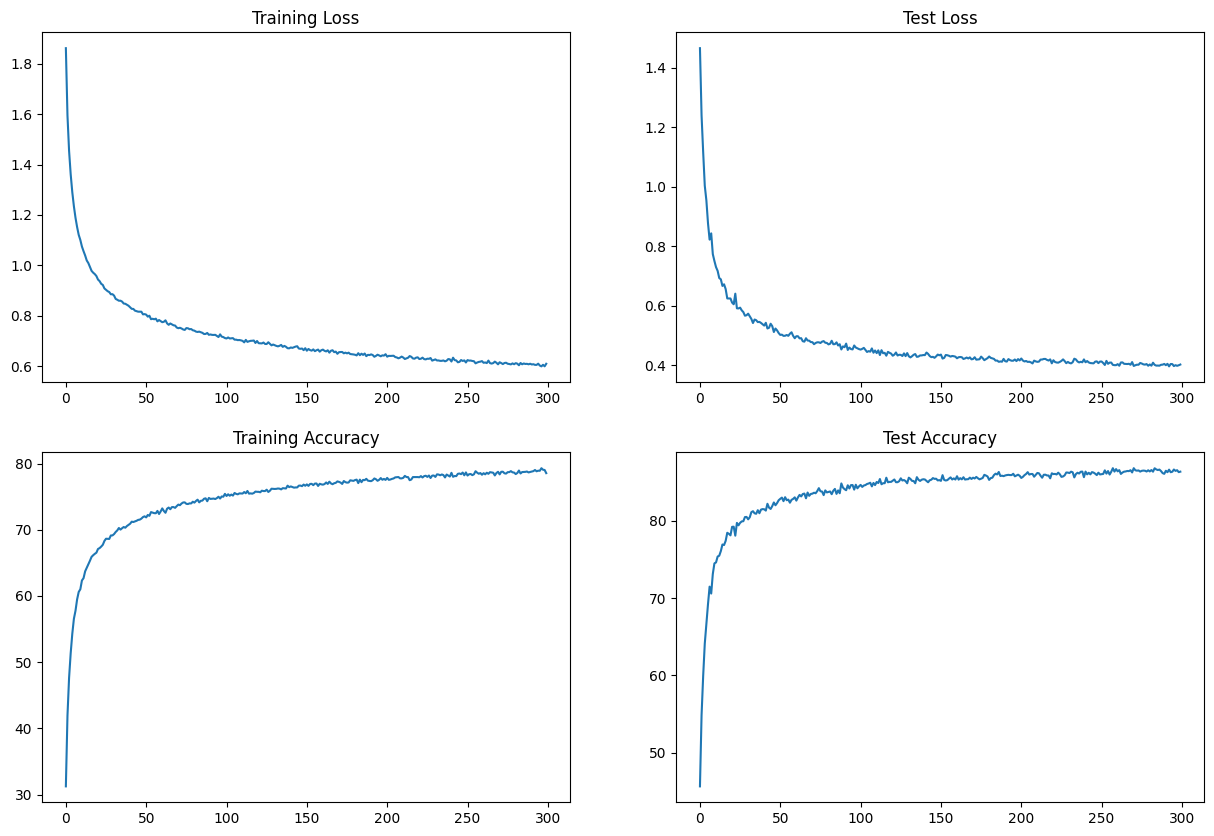

In [13]:
plot_curves()

In [14]:
wrong_prediction_list = get_incorrect_predictions(model,test_loader,device)

Total Incorrect Predictions 1366


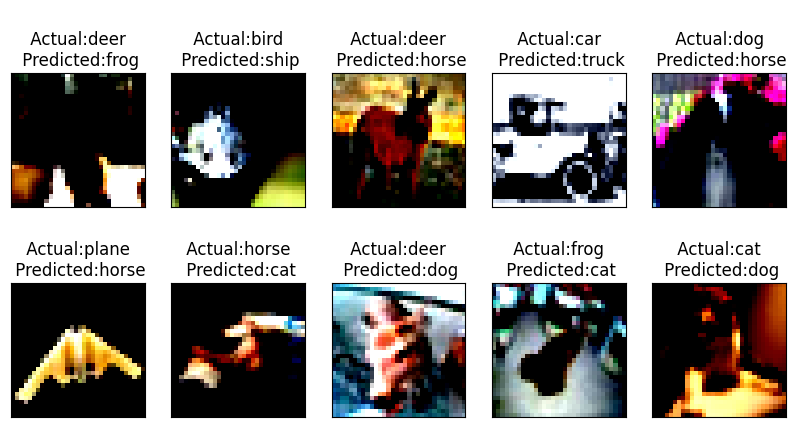

In [15]:
plot_incorrect_predictions(wrong_prediction_list,classes)

## Confusion Matrix

Confusion matrix, without normalization


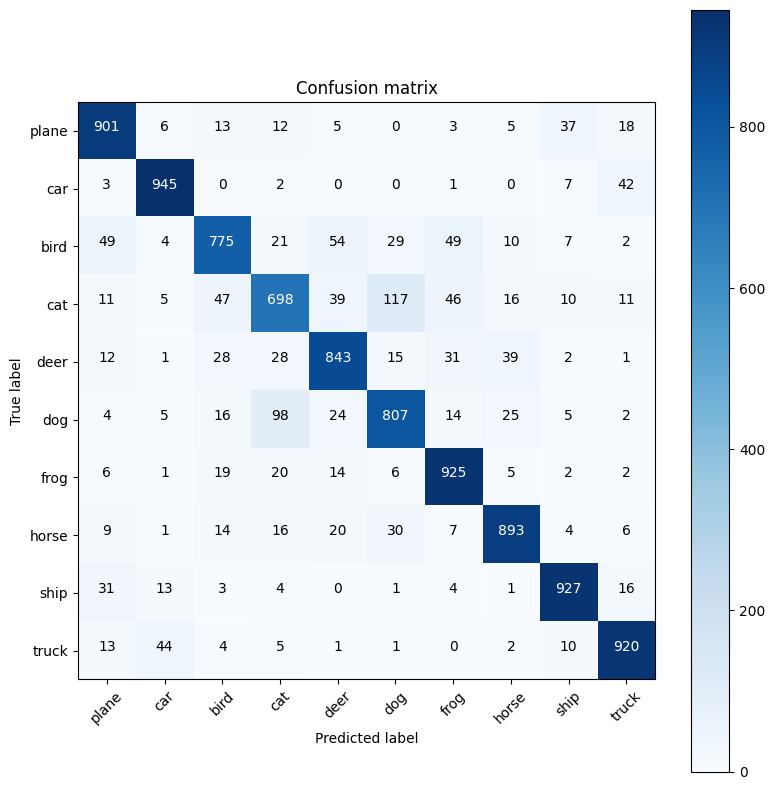

In [16]:
from utils import get_all_predictions, get_incorrect_predictions, prepare_confusion_matrix

all_preds, all_targets = get_all_predictions(model, test_loader, device)
confusion_matrix = prepare_confusion_matrix(all_preds, all_targets, classes)
plot_confusion_matrix(confusion_matrix, classes, False)

## Save Model

In [17]:
torch.save(model.state_dict(), 'model_bn.pth')

In [18]:
# Load Model
#model = Net(norm="BN").to(device)
#model.load_state_dict(torch.load('model_bn.pth'))